In [ ]:
import os
import sys
sys.path.insert(0, os.path.abspath('../../'))

import numpy as np
from matplotlib import pyplot as plt
import h5py
import arrayfire as af

from dg_maxwell import params
from dg_maxwell import msh_parser
from dg_maxwell import lagrange
from dg_maxwell import global_variables as gvar
from dg_maxwell import advection_2d_arbit_mesh as a2d_arbit_mesh
from dg_maxwell import utils

af.set_backend(params.backend)
af.set_device(params.device)

plt.rcParams['figure.figsize']     = 12, 7.5
plt.rcParams['lines.linewidth']    = 1.5
plt.rcParams['font.family']        = 'serif'
plt.rcParams['font.weight']        = 'bold'
plt.rcParams['font.size']          = 20  
plt.rcParams['font.sans-serif']    = 'serif'
plt.rcParams['text.usetex']        = True
plt.rcParams['axes.linewidth']     = 1.5
plt.rcParams['axes.titlesize']     = 'medium'
plt.rcParams['axes.labelsize']     = 'medium'

plt.rcParams['xtick.major.size']   = 8
plt.rcParams['xtick.minor.size']   = 4
plt.rcParams['xtick.major.pad']    = 8
plt.rcParams['xtick.minor.pad']    = 8
plt.rcParams['xtick.color']        = 'k'
plt.rcParams['xtick.labelsize']    = 'medium'
plt.rcParams['xtick.direction']    = 'in'    

plt.rcParams['ytick.major.size']   = 8
plt.rcParams['ytick.minor.size']   = 4
plt.rcParams['ytick.major.pad']    = 8
plt.rcParams['ytick.minor.pad']    = 8
plt.rcParams['ytick.color']        = 'k'
plt.rcParams['ytick.labelsize']    = 'medium'
plt.rcParams['ytick.direction']    = 'in'
plt.rcParams['text.usetex']        = True
plt.rcParams['text.latex.unicode'] = True

In [ ]:
def print_with_index(datas):
    datas = np.array(datas)
    for index, row in enumerate(datas):
        print(index, '\t->', end = '\t')
        for data in row:
            print(np.round(data, 3), end = '\t')
        print()
    print()

In [44]:
params.mesh_file = '../read_and_plot_mesh/mesh/'
advec_var = gvar.advection_variables(params.N_LGL, params.N_quad,
                                     params.x_nodes, params.N_Elements,
                                     params.c, params.total_time, params.wave,
                                     params.c_x, params.c_y, params.courant,
                                     params.mesh_file, params.total_time_2d)

/home/ubermensch/.local/anaconda3/lib/python3.6/site-packages/numpy/lib/polynomial.py:1193: FutureWarning: In the future extra properties will not be copied across when constructing one poly1d from another
  other = poly1d(other)
/home/ubermensch/.local/anaconda3/lib/python3.6/site-packages/numpy/lib/polynomial.py:1220: FutureWarning: In the future extra properties will not be copied across when constructing one poly1d from another
  other = poly1d(other)


gmshTranslator: Initializing...
gmshTranslator: Mesh has 704 nodes.
gmshTranslator: Mesh has 232 elements.
gmshTranslator: Processed 940 lines.
gmshTranslator: There are 1 physical groups available: 
gmshTranslator:      > 0
gmshTranslator: Parsing nodes
gmshTranslator: Parsing elements
gmshTranslator: No rules for elements... skipping elements.
gmshTranslator: Parsing nodes
gmshTranslator: No rules for nodes... skipping nodes.
gmshTranslator: Parsing elements
advection_variables __init__ completed


gmshTranslator: Ending


/home/ubermensch/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


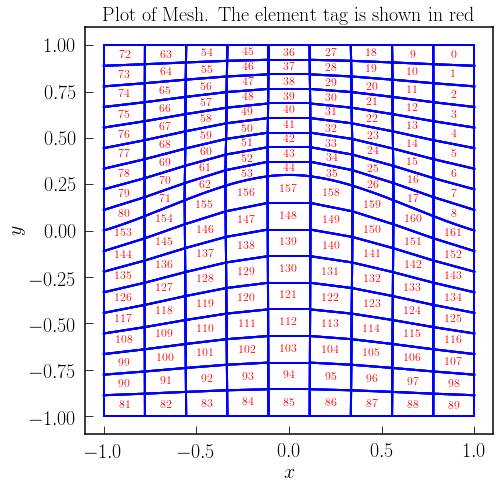

In [45]:
axes_handler = plt.axes()


msh_parser.plot_mesh_grid(advec_var.nodes, advec_var.elements,
                          advec_var.xi_LGL, advec_var.eta_LGL,
                          axes_handler, plot_LGL_grid = False,
                          print_element_tag = True)

# plt.title(r'Grid plot of a mesh for $N_{LGL} = 8$.'
#           '\n Red lines are mesh grid, and \n'
#           'blue lines are element boundaries.')
plt.title(r'Plot of Mesh. The element tag is shown in red')
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')

plt.xlim(-1.1, 1.1)
plt.ylim(-1.1, 1.1)
plt.axes().set_aspect('equal')

# plt.savefig('square.png')
plt.show()

# Prototype to detect an edge of a quadrangle

In [36]:
elements = advec_var.elements

element_tag = 0

x_edge = af.constant(0., d0 = advec_var.elements.shape[0], d1 = params.N_LGL, d2 = 4, dtype = af.Dtype.f64)
y_edge = af.constant(0., d0 = advec_var.elements.shape[0], d1 = params.N_LGL, d2 = 4, dtype = af.Dtype.f64)

edge_id = 0
x_edge[:, :, edge_id] = af.transpose(a2d_arbit_mesh.u_at_edge(advec_var.x_e_ij,
                                                              edge_id, advec_var))
y_edge[:, :, edge_id] = af.transpose(a2d_arbit_mesh.u_at_edge(advec_var.y_e_ij,
                                                              edge_id, advec_var))

edge_id = 1
x_edge[:, :, edge_id] = af.transpose(a2d_arbit_mesh.u_at_edge(advec_var.x_e_ij,
                                                              edge_id, advec_var))
y_edge[:, :, edge_id] = af.transpose(a2d_arbit_mesh.u_at_edge(advec_var.y_e_ij,
                                                              edge_id, advec_var))


edge_id = 2
x_edge[:, :, edge_id] = af.transpose(a2d_arbit_mesh.u_at_edge(advec_var.x_e_ij,
                                                              edge_id, advec_var))
y_edge[:, :, edge_id] = af.transpose(a2d_arbit_mesh.u_at_edge(advec_var.y_e_ij,
                                                              edge_id, advec_var))

edge_id = 3
x_edge[:, :, edge_id] = af.transpose(a2d_arbit_mesh.u_at_edge(advec_var.x_e_ij,
                                                              edge_id, advec_var))
y_edge[:, :, edge_id] = af.transpose(a2d_arbit_mesh.u_at_edge(advec_var.y_e_ij,
                                                              edge_id, advec_var))


In [37]:
x_edge_c = af.mean(x_edge, dim = 1)
y_edge_c = af.mean(y_edge, dim = 1)

x_quad_c = af.mean(af.mean(x_edge, dim = 1), dim = 2)
y_quad_c = af.mean(af.mean(y_edge, dim = 1), dim = 2)

/home/ubermensch/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


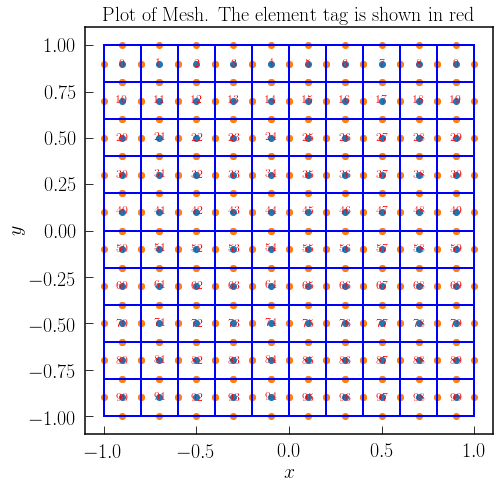

In [38]:
# Testing if the centroids are correct

axes_handler = plt.axes()


msh_parser.plot_mesh_grid(advec_var.nodes, advec_var.elements,
                          advec_var.xi_LGL, advec_var.eta_LGL,
                          axes_handler, plot_LGL_grid = False,
                          print_element_tag = True)

plt.scatter(x_quad_c, y_quad_c)
plt.scatter(af.moddims(x_edge_c, d0 = advec_var.elements.shape[0] * 4, d1 = 1, d2 = 1),
            af.moddims(y_edge_c, d0 = advec_var.elements.shape[0] * 4, d1 = 1, d2 = 1))

plt.title(r'Plot of Mesh. The element tag is shown in red')
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')

plt.xlim(-1.1, 1.1)
plt.ylim(-1.1, 1.1)
plt.axes().set_aspect('equal')

# plt.savefig('square.png')
plt.show()

In [39]:
delta_x_edge_c = af.reorder(af.broadcast(utils.add, x_edge_c, -x_quad_c), d0 = 0, d1 = 2, d2 = 1)
delta_y_edge_c = af.reorder(af.broadcast(utils.add, y_edge_c, -y_quad_c), d0 = 0, d1 = 2, d2 = 1)

In [40]:
delta_xy_complex = np.array(delta_x_edge_c + 1j * delta_y_edge_c)

In [41]:
edge_angle = af.np_to_af_array(np.angle(delta_xy_complex, deg = True))
angle_less_than_zero = af.cast(edge_angle < 0, dtype = af.Dtype.f64)
edge_angle = edge_angle + angle_less_than_zero * 360
print(edge_angle)

arrayfire.Array()
Type: double

[100 4 1 1]
  180.0000   270.0000   360.0000    90.0000 
  180.0000   270.0000   360.0000    90.0000 
  180.0000   270.0000   360.0000    90.0000 
  180.0000   270.0000   360.0000    90.0000 
  180.0000   270.0000   360.0000    90.0000 
  180.0000   270.0000   360.0000    90.0000 
  180.0000   270.0000   360.0000    90.0000 
  180.0000   270.0000   360.0000    90.0000 
  180.0000   270.0000   360.0000    90.0000 
  180.0000   270.0000   360.0000    90.0000 
  180.0000   270.0000   360.0000    90.0000 
  180.0000   270.0000   360.0000    90.0000 
  180.0000   270.0000   360.0000    90.0000 
  180.0000   270.0000   360.0000    90.0000 
  180.0000   270.0000   360.0000    90.0000 
  180.0000   270.0000   360.0000    90.0000 
  180.0000   270.0000   360.0000    90.0000 
  180.0000   270.0000   360.0000    90.0000 
  180.0000   270.0000   360.0000    90.0000 
  180.0000   270.0000   360.0000    90.0000 
  180.0000   270.0000   360.0000    90.0000 
  180.0000 

In [42]:
# Identifying physical right edges
physical_right_edge = (edge_angle > 271.) * (edge_angle <= 360) + (edge_angle >= 0.) * (edge_angle < 89)

# Identifying physical top edges
physical_top_edge = (edge_angle > 1.) * (edge_angle < 179)

# Identifying physical left edges
physical_left_edge = (edge_angle > 91.) * (edge_angle < 269)

# Identifying physical left edges
physical_bottom_edge = (edge_angle > 181.) * (edge_angle < 359)

In [43]:
print_with_index(physical_left_edge)

0 	->	1	0	0	0	
1 	->	1	0	0	0	
2 	->	1	0	0	0	
3 	->	1	0	0	0	
4 	->	1	0	0	0	
5 	->	1	0	0	0	
6 	->	1	0	0	0	
7 	->	1	0	0	0	
8 	->	1	0	0	0	
9 	->	1	0	0	0	
10 	->	1	0	0	0	
11 	->	1	0	0	0	
12 	->	1	0	0	0	
13 	->	1	0	0	0	
14 	->	1	0	0	0	
15 	->	1	0	0	0	
16 	->	1	0	0	0	
17 	->	1	0	0	0	
18 	->	1	0	0	0	
19 	->	1	0	0	0	
20 	->	1	0	0	0	
21 	->	1	0	0	0	
22 	->	1	0	0	0	
23 	->	1	0	0	0	
24 	->	1	0	0	0	
25 	->	1	0	0	0	
26 	->	1	0	0	0	
27 	->	1	0	0	0	
28 	->	1	0	0	0	
29 	->	1	0	0	0	
30 	->	1	0	0	0	
31 	->	1	0	0	0	
32 	->	1	0	0	0	
33 	->	1	0	0	0	
34 	->	1	0	0	0	
35 	->	1	0	0	0	
36 	->	1	0	0	0	
37 	->	1	0	0	0	
38 	->	1	0	0	0	
39 	->	1	0	0	0	
40 	->	1	0	0	0	
41 	->	1	0	0	0	
42 	->	1	0	0	0	
43 	->	1	0	0	0	
44 	->	1	0	0	0	
45 	->	1	0	0	0	
46 	->	1	0	0	0	
47 	->	1	0	0	0	
48 	->	1	0	0	0	
49 	->	1	0	0	0	
50 	->	1	0	0	0	
51 	->	1	0	0	0	
52 	->	1	0	0	0	
53 	->	1	0	0	0	
54 	->	1	0	0	0	
55 	->	1	0	0	0	
56 	->	1	0	0	0	
57 	->	1	0	0	0	
58 	->	1	0	0	0	
59 	->	1	0	0	0	
60 	->	1	0	0	0	
61 	->	1	0	0	0	
62 	->	1	0	0	0	
63